# Baseline Classifier Test

Provides evidence that an SVM should be used over a Random Forest when operating on a bag of words representation.

In [2]:
# Make common scripts visible
import sys
sys.path.append('../common/')

import numpy as np
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier

from experiments_common import shuffled_train_test_split
from term_document_matrix import TermDocumentMatrixCreator
from classification import run_support_vector_classifier
from loader import load_preprocessed_data


# To run a Random Forest on bag of words
def run_random_forest(train_x, train_y, test_x):
    tdm_creator = TermDocumentMatrixCreator(train_x)
    train_tdm = tdm_creator.create_term_document_matrix(train_x)
    test_tdm = tdm_creator.create_term_document_matrix(test_x)
    
    classifier = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
    classifier.fit(train_tdm, train_y)
    predict_y = classifier.predict(test_tdm)
    
    return predict_y


# Load the already lowercased, lemmatised data
train_x, train_y = load_preprocessed_data('data/uvigomed_train.csv')
test_x, test_y = load_preprocessed_data('data/uvigomed_test.csv')

# Join the data back together and obtain a train/test split
x = train_x + test_x
y = train_y + test_y
train_x, train_y, test_x, test_y = shuffled_train_test_split(x, y)

svc_results = []
rf_results = []

# Run the classifiers at each training set size
train_sizes = [100, 200, 500, 1000, 2000, 5000, 10000, 20000, len(train_x)]
for train_size in train_sizes:
    
    # Random Forest
    predict_y = run_random_forest(train_x[:train_size], train_y[:train_size], test_x)
    micro = f1_score(test_y, predict_y, average='micro')
    rf_results.append(micro)
    
    # Support Vector Machine
    predict_y = run_support_vector_classifier(train_x[:train_size], train_y[:train_size], test_x, C=0.01)
    micro = f1_score(test_y, predict_y, average='micro')
    svc_results.append(micro)

Number of words in vocabulary: 3664
Number of words in vocabulary: 3664
Number of words in vocabulary: 5611
Number of words in vocabulary: 5611
Number of words in vocabulary: 9320
Number of words in vocabulary: 9320
Number of words in vocabulary: 13670
Number of words in vocabulary: 13670
Number of words in vocabulary: 20092
Number of words in vocabulary: 20092
Number of words in vocabulary: 33134
Number of words in vocabulary: 33134
Number of words in vocabulary: 47971
Number of words in vocabulary: 47971
Number of words in vocabulary: 69518
Number of words in vocabulary: 69518
Number of words in vocabulary: 104876
Number of words in vocabulary: 104876


Now plot the results.

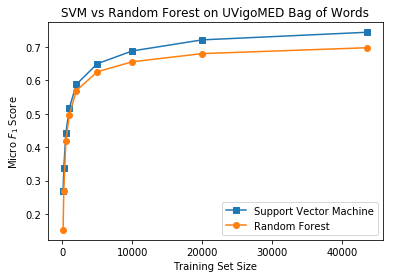

In [4]:
import matplotlib.pyplot as plt

plt.title('SVM vs Random Forest on UVigoMED Bag of Words')
plt.ylabel('Micro $F_1$ Score')
plt.xlabel('Training Set Size')
plt.plot(train_sizes, svc_results,'-s', label='Support Vector Machine')
plt.plot(train_sizes, rf_results, '-o', label='Random Forest')
plt.legend(loc='lower right')
plt.savefig('rf_vs_svm_bow_uvigomed.pdf', bbox_inches='tight')
plt.show()